##### Tilii的方案 https://www.kaggle.com/c/human-protein-atlas-image-classification/discussion/74065

In [26]:
#mu in "create_class_weight" is a dampening parameter that could be tuned

import numpy as np
import math

def create_class_weight(labels_dict, mu=1):
    total = 0
    for k, v in labels_dict.items():
        total += v
#     print(total)
    keys = labels_dict.keys()
    class_weight = dict()
    class_weight_log = dict()

    for key in keys:
        score = total / float(labels_dict[key])
        score_log = math.log(mu * total / float(labels_dict[key]))
        class_weight[key] = round(score, 2) if score > 1.0 else round(1.0, 2)
        class_weight_log[key] = round(score_log, 2) if score_log > 1.0 else round(1.0, 2)

    return class_weight, class_weight_log

# Class abundance for protein dataset
labels_dict = {
    0: 12885,
    1: 1254,
    2: 3621,
    3: 1561,
    4: 1858,
    5: 2513,
    6: 1008,
    7: 2822,
    8: 53,
    9: 45,
    10: 28,
    11: 1093,
    12: 688,
    13: 537,
    14: 1066,
    15: 21,
    16: 530,
    17: 210,
    18: 902,
    19: 1482,
    20: 172,
    21: 3777,
    22: 802,
    23: 2965,
    24: 322,
    25: 8228,
    26: 328,
    27: 11
}
print('\nTrue class weights:')
print(create_class_weight(labels_dict)[0])
print('\nLog-dampened class weights:')
print(create_class_weight(labels_dict)[1])


True class weights:
{0: 3.94, 1: 40.5, 2: 14.02, 3: 32.53, 4: 27.33, 5: 20.21, 6: 50.38, 7: 18.0, 8: 958.15, 9: 1128.49, 10: 1813.64, 11: 46.46, 12: 73.81, 13: 94.57, 14: 47.64, 15: 2418.19, 16: 95.82, 17: 241.82, 18: 56.3, 19: 34.27, 20: 295.24, 21: 13.45, 22: 63.32, 23: 17.13, 24: 157.71, 25: 6.17, 26: 154.82, 27: 4616.55}

Log-dampened class weights:
{0: 1.37, 1: 3.7, 2: 2.64, 3: 3.48, 4: 3.31, 5: 3.01, 6: 3.92, 7: 2.89, 8: 6.87, 9: 7.03, 10: 7.5, 11: 3.84, 12: 4.3, 13: 4.55, 14: 3.86, 15: 7.79, 16: 4.56, 17: 5.49, 18: 4.03, 19: 3.53, 20: 5.69, 21: 2.6, 22: 4.15, 23: 2.84, 24: 5.06, 25: 1.82, 26: 5.04, 27: 8.44}


In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
True_weights = create_class_weight(labels_dict)[0]
true_weights_dict = pd.DataFrame([True_weights], index=[0])
true_weights_dict.head()
# print(true_weights_dict.loc[0])


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,3.94,40.5,14.02,32.53,27.33,20.21,50.38,18.0,958.15,1128.49,...,56.3,34.27,295.24,13.45,63.32,17.13,157.71,6.17,154.82,4616.55


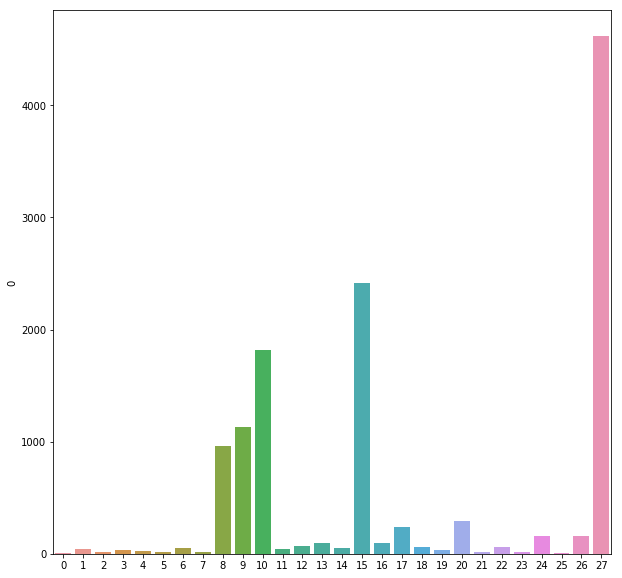

In [28]:
plt.figure(figsize=(10,10))
sns.barplot(x=true_weights_dict.columns, y=true_weights_dict.loc[0], order=true_weights_dict.columns)

In [29]:
log_weights = create_class_weight(labels_dict)[1]
log_weights_dict = pd.DataFrame([log_weights], index=[0])
log_weights_dict.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1.37,3.7,2.64,3.48,3.31,3.01,3.92,2.89,6.87,7.03,...,4.03,3.53,5.69,2.6,4.15,2.84,5.06,1.82,5.04,8.44


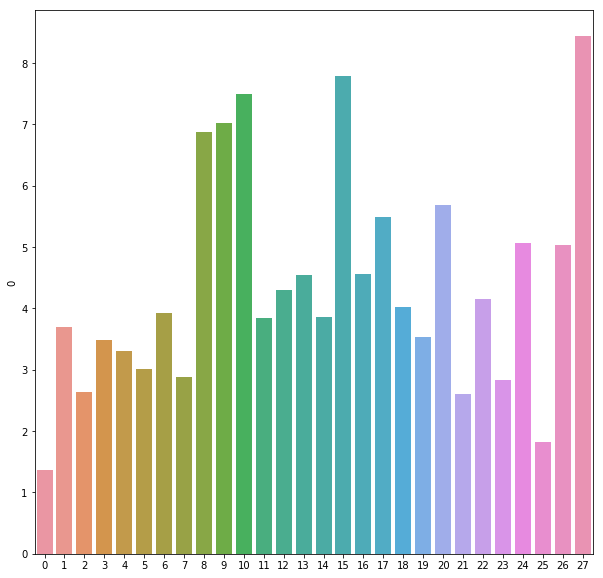

In [30]:
plt.figure(figsize=(10,10))
sns.barplot(x=log_weights_dict.columns, y=log_weights_dict.loc[0], order=log_weights_dict.columns)

###### Mark Worrall 的方案
Another (simple) approach is just to use a linear interpolation of the prior probability of a label being in a class towards equal weights.

In the below, setting mu = 0 is the original probability distribution and as mu increases we (linearly) tend to the distribution with all class weights equal (the maximum entropy distribution).



In [1]:
import numpy as np

name_label_dict = {
    0:   ('Nucleoplasm', 12885),
    1:   ('Nuclear membrane', 1254),
    2:   ('Nucleoli', 3621),
    3:   ('Nucleoli fibrillar center', 1561),
    4:   ('Nuclear speckles', 1858),
    5:   ('Nuclear bodies', 2513),
    6:   ('Endoplasmic reticulum', 1008),   
    7:   ('Golgi apparatus', 2822),
    8:   ('Peroxisomes', 53), 
    9:   ('Endosomes', 45),
    10:  ('Lysosomes', 28),
    11:  ('Intermediate filaments', 1093), 
    12:  ('Actin filaments', 688),
    13:  ('Focal adhesion sites', 537),  
    14:  ('Microtubules', 1066), 
    15:  ('Microtubule ends', 21),
    16:  ('Cytokinetic bridge', 530),
    17:  ('Mitotic spindle', 210),
    18:  ('Microtubule organizing center', 902),
    19:  ('Centrosome', 1482),
    20:  ('Lipid droplets', 172),
    21:  ('Plasma membrane', 3777),
    22:  ('Cell junctions', 802),
    23:  ('Mitochondria', 2965),
    24:  ('Aggresome', 322),
    25:  ('Cytosol', 8228),
    26:  ('Cytoplasmic bodies', 328),   
    27:  ('Rods &amp; rings', 11)
    }

n_labels = 50782

def cls_wts(label_dict, mu=0.5):
    prob_dict, prob_dict_bal = {}, {}
    max_ent_wt = 1/28
    for i in range(28):
        prob_dict[i] = label_dict[i][1]/n_labels
        if prob_dict[i] > max_ent_wt:
            prob_dict_bal[i] = prob_dict[i]-mu*(prob_dict[i] - max_ent_wt)
        else:
            prob_dict_bal[i] = prob_dict[i]+mu*(max_ent_wt - prob_dict[i])            
    return prob_dict, prob_dict_bal

In [3]:
cls_wts(name_label_dict, mu=1)

({0: 0.25373163719428143,
  1: 0.0246937891378835,
  2: 0.07130479303690283,
  3: 0.030739238312787995,
  4: 0.03658776731912883,
  5: 0.049486038360048834,
  6: 0.01984955299121736,
  7: 0.05557087156866606,
  8: 0.0010436768933874208,
  9: 0.0008861407585364893,
  10: 0.00055137647197826,
  11: 0.021523374424008507,
  12: 0.013548107597180102,
  13: 0.010574613051868773,
  14: 0.020991689968886614,
  15: 0.000413532353983695,
  16: 0.010436768933874208,
  17: 0.00413532353983695,
  18: 0.017762199204442518,
  19: 0.029183568981135048,
  20: 0.0033870268992950256,
  21: 0.074376747666496,
  22: 0.015792997518805876,
  23: 0.05838682997912646,
  24: 0.00634082942774999,
  25: 0.16202591469418298,
  26: 0.006458981528888188,
  27: 0.0002166121854200307},
 {0: 0.0357142857142857,
  1: 0.03571428571428571,
  2: 0.03571428571428571,
  3: 0.03571428571428571,
  4: 0.03571428571428571,
  5: 0.03571428571428571,
  6: 0.03571428571428571,
  7: 0.03571428571428571,
  8: 0.03571428571428571,
  9